In [1]:
import numpy as np
import seaborn as sns
from utils.arch.regular_process import mean_fn, volatility_fn, INITIAL_VALUE
from utils.arch.anomalies import shock_mean_fn, shock_volatility_fn, perturbed_mean_fn, increasing_volatility_fn, constant_mean
from utils.simulate_markov import simulate_arch_1_process, simulate_arch1_process_with_dynamic_anomaly
from utils.experiments.compare import compare_using_training_sample

# Section S5.1.4 - Comparisons with competitors

This notebook contains the code used in the experiments regarding the ARCH(1) model in Section S5.1.4 of the Supplementary material.

In [2]:
# Set up the Seaborn style
sns.set(style="whitegrid")

In [3]:
# Fix the random seed for reproducibility 
random_seed = 7
np.random.seed(random_seed)

In [4]:
# Number of steps on each trajectory
n_steps = 200

# Number of steps on the long trajectory
n_steps_long_trajectory = n_steps*10

TOTAL_TRAJECTORIES = 100
PERCENTAGE_NORMAL = 0.95  # 95% of normal trajectories

# Number of test trajectories to simulate
T = 10

# Number of normal trajectories to simulate
M = int(PERCENTAGE_NORMAL*TOTAL_TRAJECTORIES)

# Number of anomalous trajectories to simulate 
A = TOTAL_TRAJECTORIES-M

# For non-shock models, percent of the trajectory that
# is abnormal
ABNORMAL_PART_LENGTH_PERCENT = 0.6

In [5]:
# Simulate test ARCH(1) processes
random_seed +=1
training_arch_trajectories = np.array(simulate_arch_1_process(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=T,
    seed=random_seed,
))

In [6]:
# Simulate  ARCH(1) processes
random_seed +=1
regular_arch_trajectories = simulate_arch_1_process(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=M,
    seed=random_seed,
)

In [7]:
# Simulate  ARCH(1) processes
random_seed +=1
long_trajectory = simulate_arch_1_process(
    n_steps=n_steps_long_trajectory, 
    m=mean_fn, 
    sigma=volatility_fn, 
    initial_value=INITIAL_VALUE, 
    num_processes=1,
    seed=random_seed,
)[0]

## Model 1 (Shock)

Applying Isolation Forest
Finished Isolation Forest


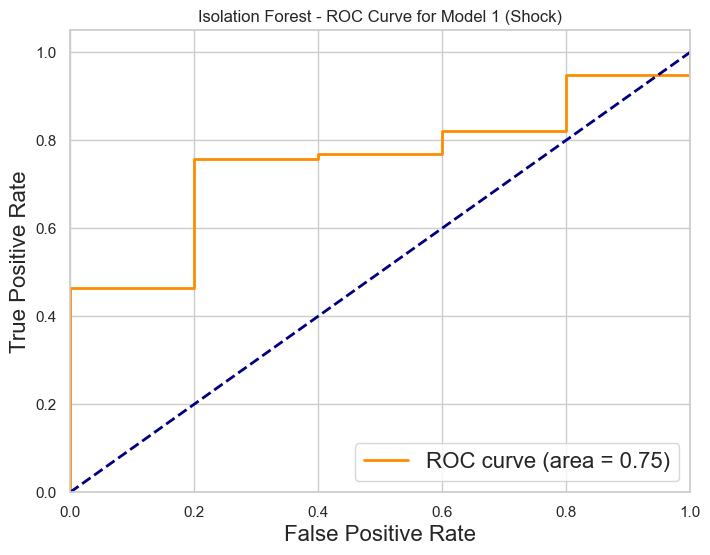

Applying LOF
Finished LOF


/Users/carlos/.virtualenvs/neurips2024/lib/python3.10/site-packages/sklearn/neighbors/_lof.py:283: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


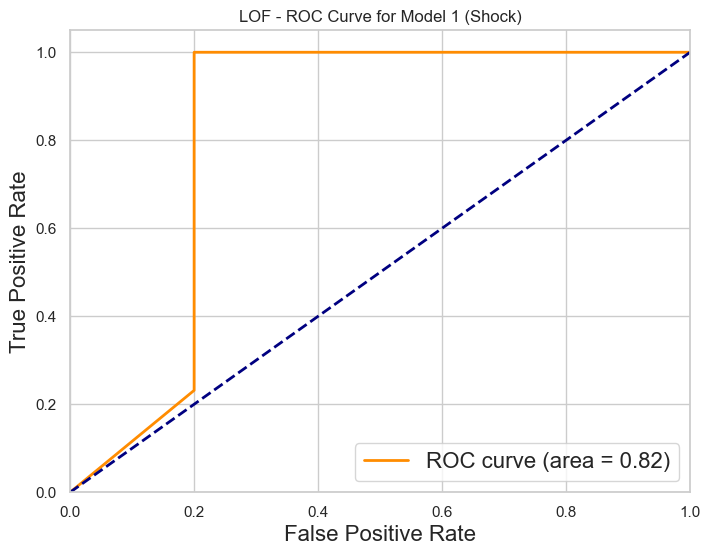

Calculating markovian depths using the long trajectory.


/Users/carlos/work/Post-Doc/Statistical depth/depth_markov/utils/kernel_estimation.py:89: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(K * L) / denominator


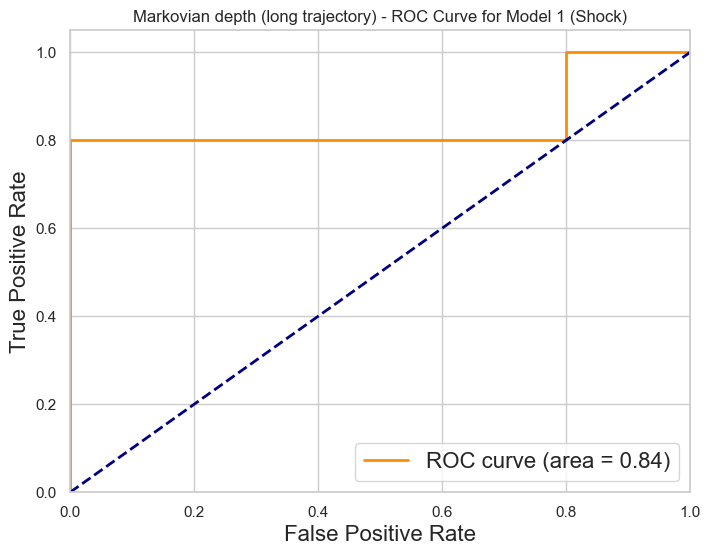

Finished calculating markovian depths using the long trajectory.
Calculating markovian depths using averaging.


/Users/carlos/work/Post-Doc/Statistical depth/depth_markov/utils/kernel_estimation.py:89: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(K * L) / denominator


Finished calculating markovian depths using averaging.
Applying mahalanobis depth


/Users/carlos/.virtualenvs/neurips2024/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Finished mahalanobis depth


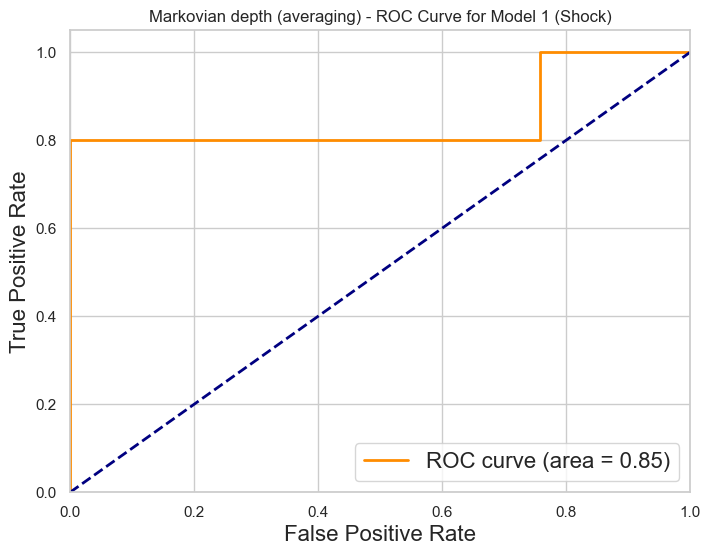

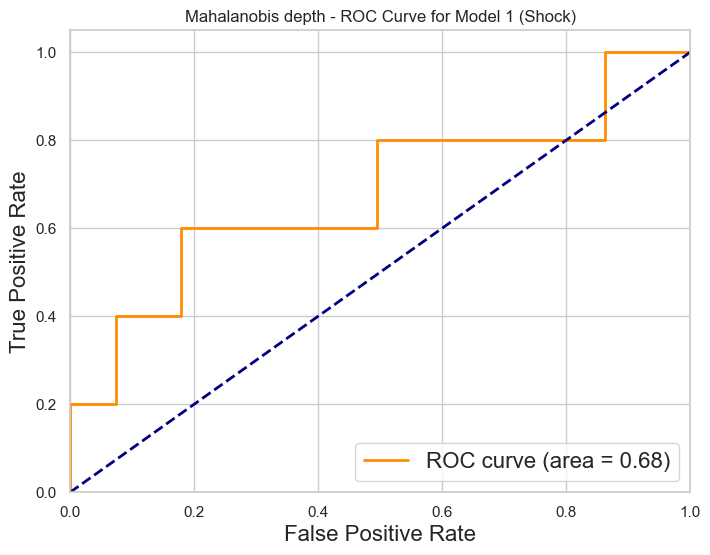

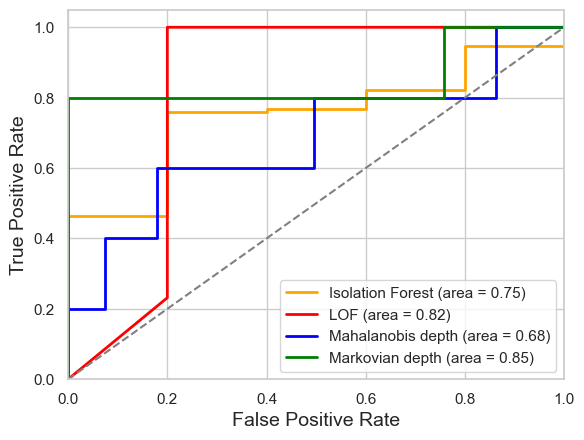

In [8]:
model_name = "Model 1 (Shock)"

# Simulate anomalous ARCH(1) processes
random_seed +=1
anomalous_shock_arch_trajectories = simulate_arch1_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    anomalous_m=shock_mean_fn,
    anomalous_sigma=shock_volatility_fn,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_size=2,
    seed=random_seed,
)

compare_using_training_sample(normal_trajectories=regular_arch_trajectories, anomalous_trajectories=anomalous_shock_arch_trajectories, training_trajectories=training_arch_trajectories, random_seed=random_seed, model_name=model_name, long_trajectory=long_trajectory)

## Model 2 (perturbed mean)

Applying Isolation Forest
Finished Isolation Forest


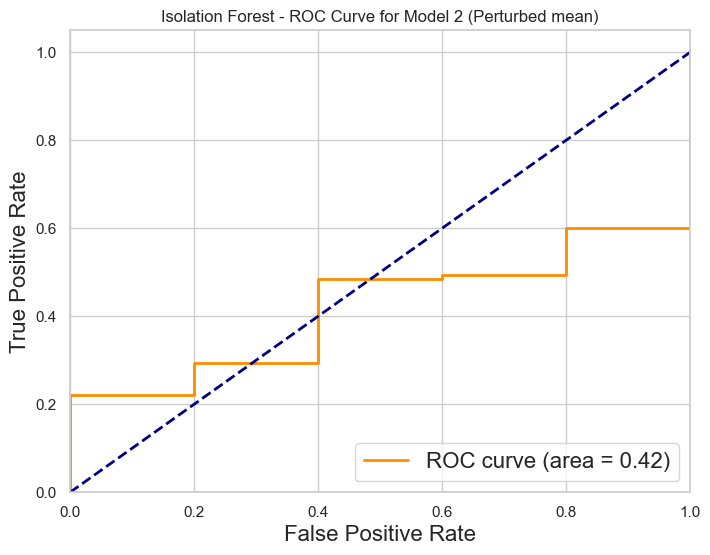

Applying LOF
Finished LOF


/Users/carlos/.virtualenvs/neurips2024/lib/python3.10/site-packages/sklearn/neighbors/_lof.py:283: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


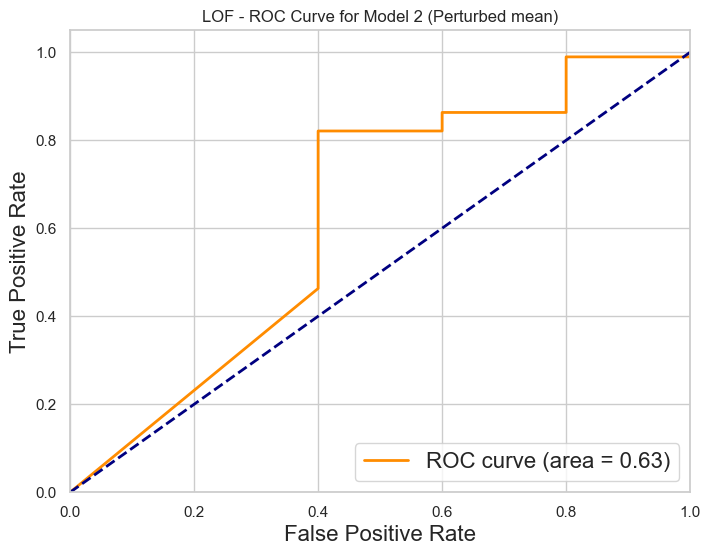

Calculating markovian depths using the long trajectory.


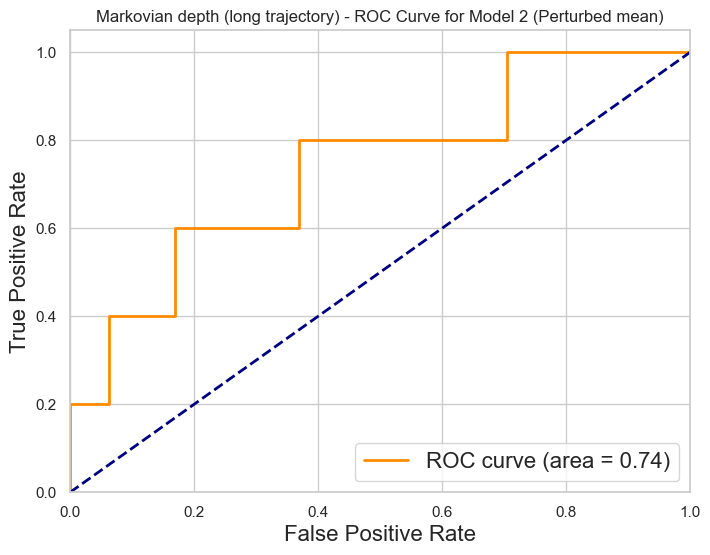

Finished calculating markovian depths using the long trajectory.
Calculating markovian depths using averaging.
Finished calculating markovian depths using averaging.
Applying mahalanobis depth


/Users/carlos/.virtualenvs/neurips2024/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Finished mahalanobis depth


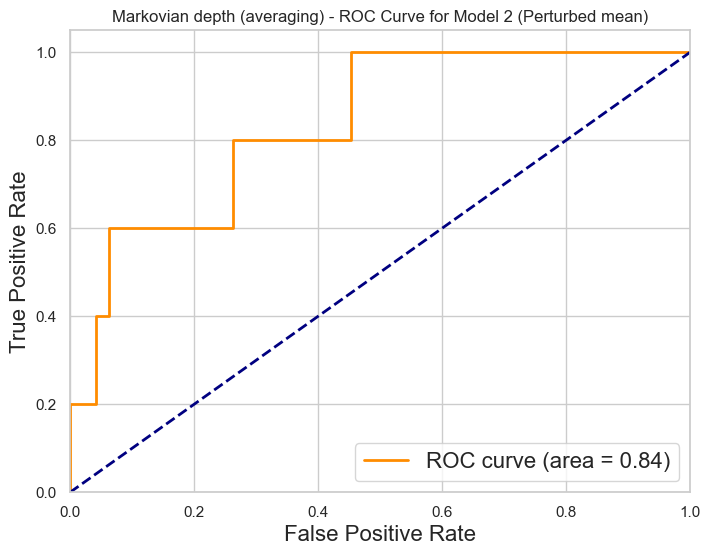

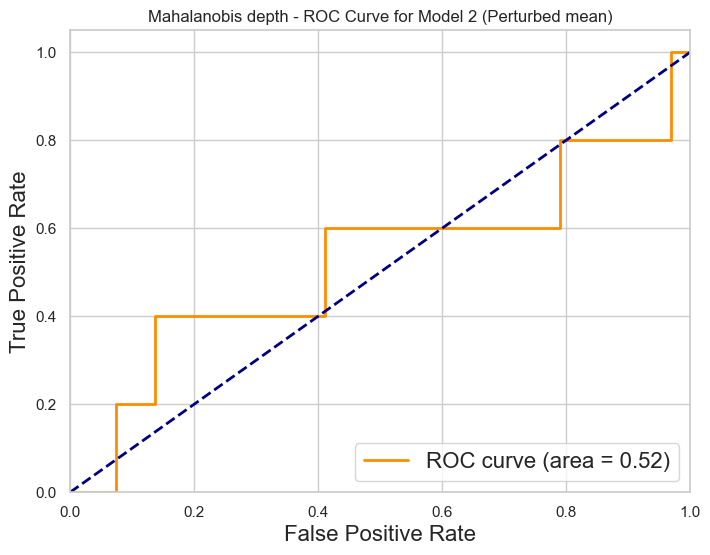

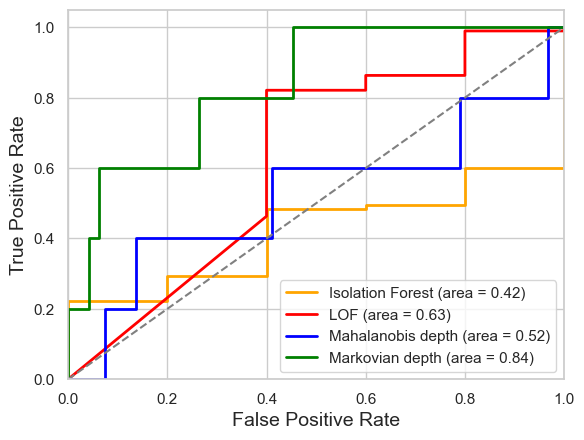

In [9]:
model_name = "Model 2 (Perturbed mean)"

# Simulate anomalous ARCH(1) processes
random_seed +=1
anomalous_perturbed_mean_arch_trajectories = simulate_arch1_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    anomalous_m=perturbed_mean_fn,
    anomalous_sigma=volatility_fn,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_size=ABNORMAL_PART_LENGTH_PERCENT,
    seed=random_seed,
)

compare_using_training_sample(normal_trajectories=regular_arch_trajectories, anomalous_trajectories=anomalous_perturbed_mean_arch_trajectories, training_trajectories=training_arch_trajectories, random_seed=random_seed, model_name=model_name, long_trajectory=long_trajectory)

## Model 3 (increasing volatility)

Applying Isolation Forest
Finished Isolation Forest


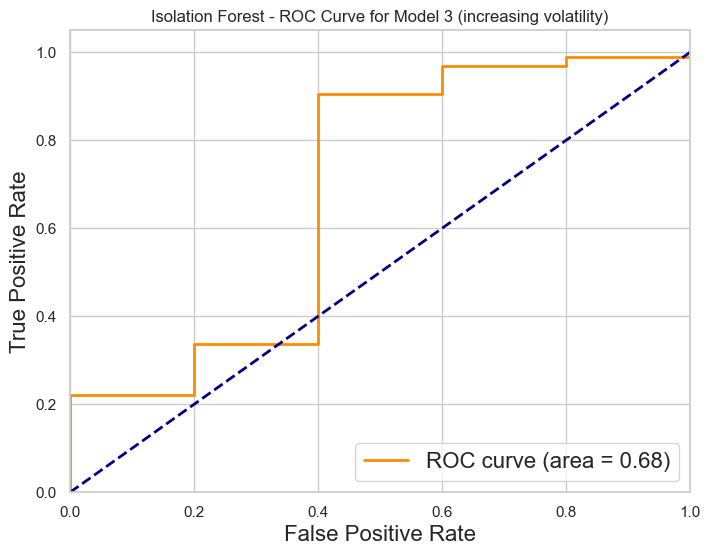

Applying LOF
Finished LOF


/Users/carlos/.virtualenvs/neurips2024/lib/python3.10/site-packages/sklearn/neighbors/_lof.py:283: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


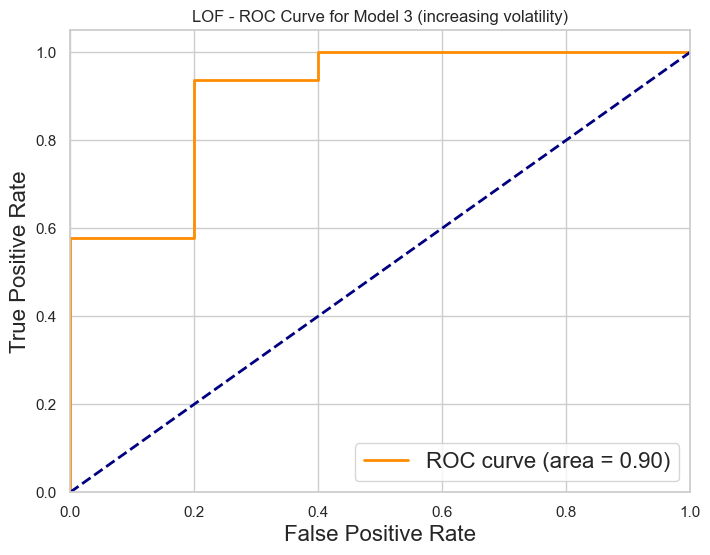

Calculating markovian depths using the long trajectory.


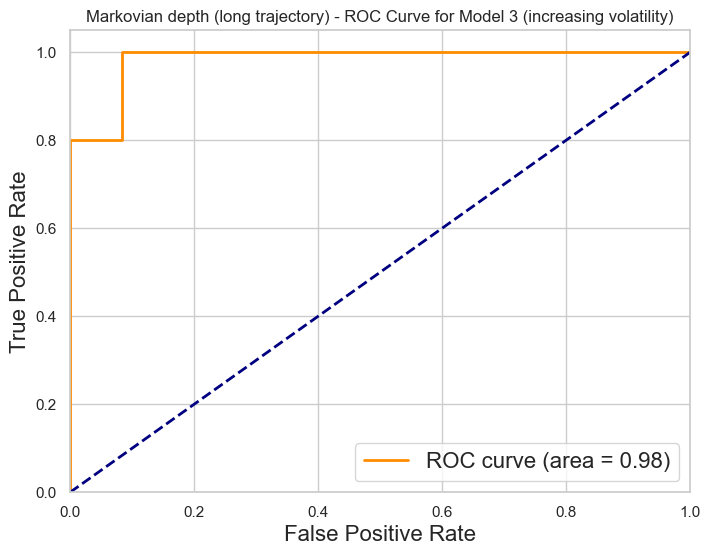

Finished calculating markovian depths using the long trajectory.
Calculating markovian depths using averaging.
Finished calculating markovian depths using averaging.
Applying mahalanobis depth


/Users/carlos/.virtualenvs/neurips2024/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Finished mahalanobis depth


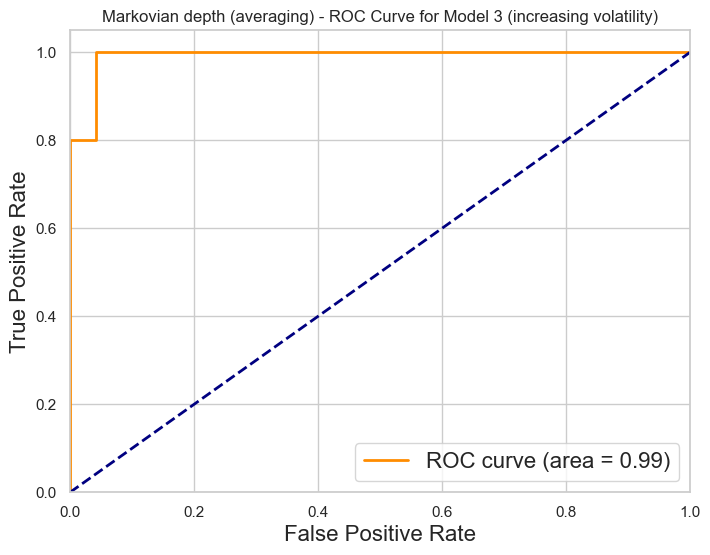

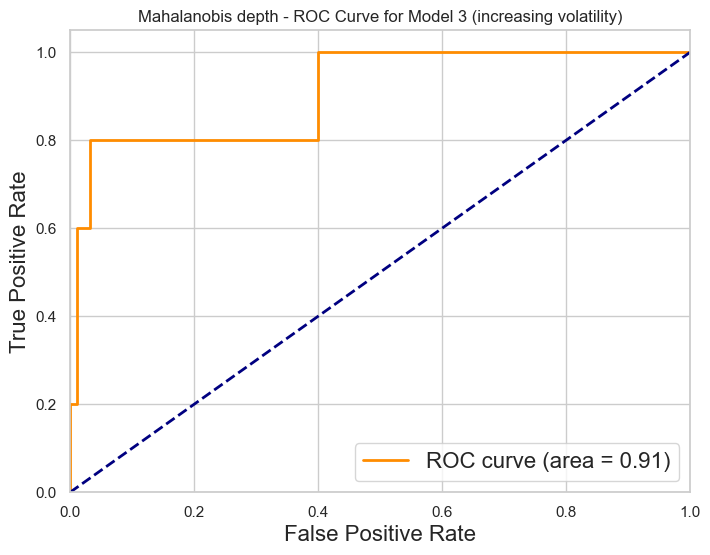

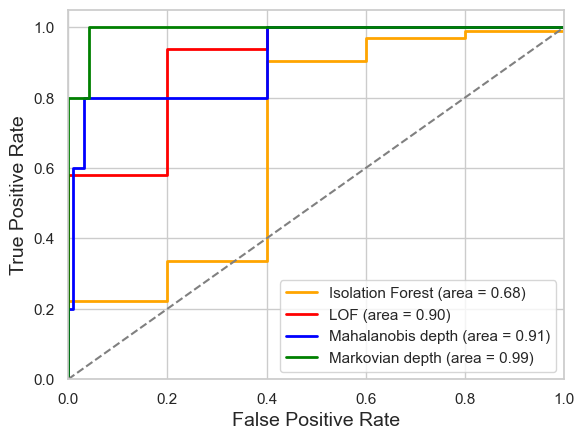

In [10]:
model_name = "Model 3 (increasing volatility)"

# Simulate anomalous ARCH(1) processes
random_seed +=1
anomalous_increasing_volatility_arch_trajectories = simulate_arch1_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    anomalous_m=mean_fn,
    anomalous_sigma=increasing_volatility_fn,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_size=ABNORMAL_PART_LENGTH_PERCENT,
    seed=random_seed,
)

compare_using_training_sample(normal_trajectories=regular_arch_trajectories, anomalous_trajectories=anomalous_increasing_volatility_arch_trajectories, training_trajectories=training_arch_trajectories, random_seed=random_seed, model_name=model_name, long_trajectory=long_trajectory)

## Model 4 (Constant mean)

Applying Isolation Forest
Finished Isolation Forest


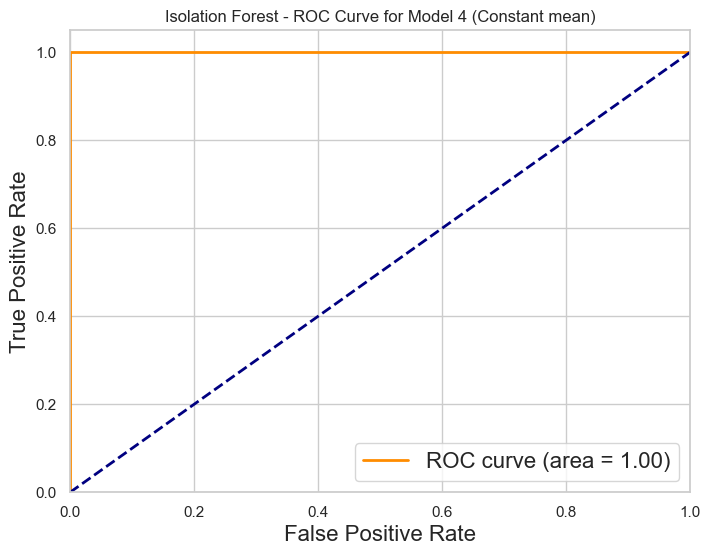

Applying LOF
Finished LOF


/Users/carlos/.virtualenvs/neurips2024/lib/python3.10/site-packages/sklearn/neighbors/_lof.py:283: UserWarning: n_neighbors (20) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


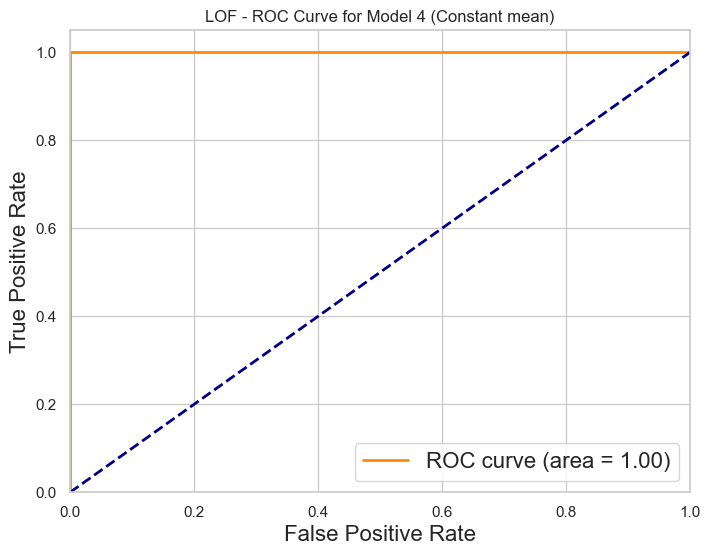

Calculating markovian depths using the long trajectory.


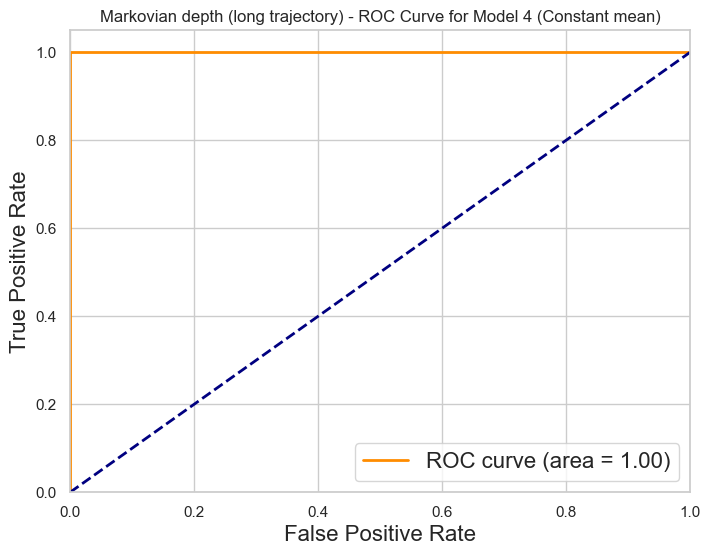

Finished calculating markovian depths using the long trajectory.
Calculating markovian depths using averaging.
Finished calculating markovian depths using averaging.
Applying mahalanobis depth


/Users/carlos/.virtualenvs/neurips2024/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Finished mahalanobis depth


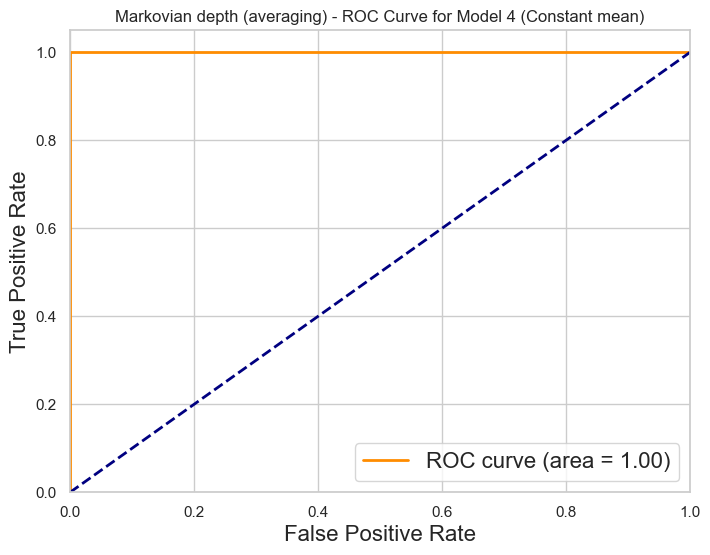

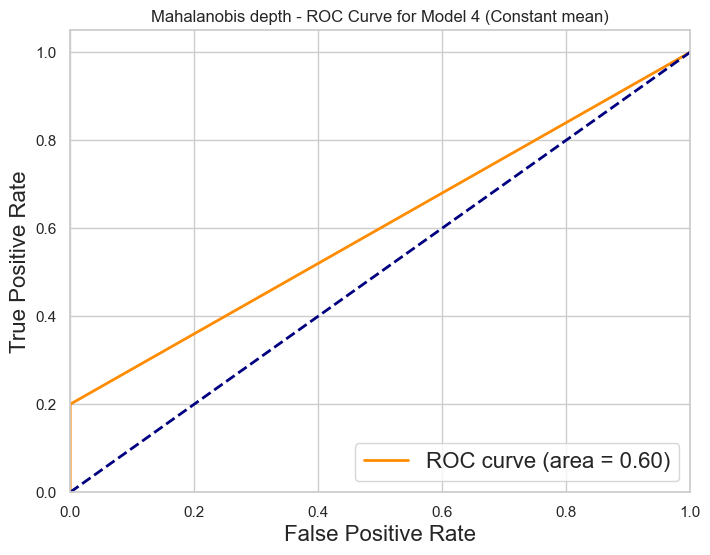

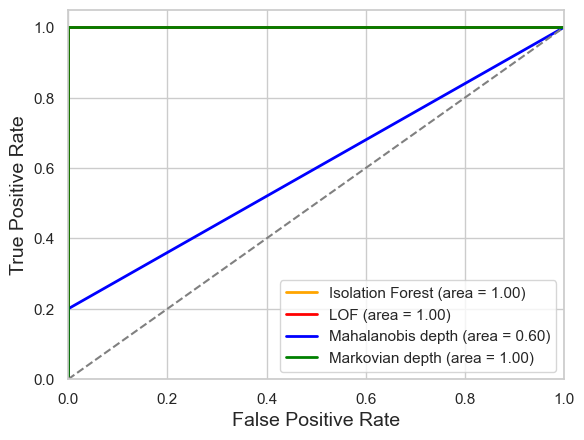

In [11]:
model_name = "Model 4 (Constant mean)"

# Simulate anomalous ARCH(1) processes
random_seed +=1
anomalous_constant_mean_arch_trajectories = simulate_arch1_process_with_dynamic_anomaly(
    n_steps=n_steps, 
    m=mean_fn, 
    sigma=volatility_fn, 
    anomalous_m=constant_mean,
    anomalous_sigma=volatility_fn,
    initial_value=INITIAL_VALUE, 
    num_processes=A, 
    anomaly_size=ABNORMAL_PART_LENGTH_PERCENT,
    seed=random_seed,
)

compare_using_training_sample(normal_trajectories=regular_arch_trajectories, anomalous_trajectories=anomalous_constant_mean_arch_trajectories, training_trajectories=training_arch_trajectories, random_seed=random_seed, model_name=model_name, long_trajectory=long_trajectory)